# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ \mathbf{w_{new}} = \mathbf{w_{old}} - \alpha \left(\frac{2}{N}\sum_{i=1}^{n}{(\mathbf{x_{i}} \cdot \mathbf{w_{old}} - y_{i})\mathbf{x_{i}}} + \frac{2}{C}\mathbf{w_{old}}\right)$$
Неформально говоря, градиент-это вектор, указывающий направление наибольшего роста функции

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$ \Large\nabla_{w}Q(\mathbf{{w}}) = -\frac{1}{N} \frac{\partial}{\partial\mathbf{{w}}}
\left[\sum_{i=1}^{N}
{y_i \log{\sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)} - (1 - y_i) \log{(1-\sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle))}
}\right] + \frac{1}{C} \frac{\partial}{\partial\mathbf{{w}}} \sum_{j=1}^{D}w_j^2
$$


$$ \Large\frac{\partial}{\partial\mathbf{{w}}} \left[y_i \log{\sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)} + (1 - y_i) \log{(1 - \sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle))}\right] = \left[\frac{y_i}{\sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)} + \frac{1 - y_i}{1 - \sigma(\langle\mathbf{{w}}\mathbf{{x_i}}\rangle)}\right]\cdot\frac{d\sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)}{d\mathbf{{w}}} = \left[y_i (1 - \sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)) - (1 - y_i) \sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)\right] \mathbf{{x_i}} = \left[y_i - \sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)\right]\mathbf{{x_i}} $$
И
$$
\frac{\partial}{\partial\mathbf{{w}}} \sum_{j=1}^{D}w_j^2 = 2 \mathbf{{w}}
$$

$$\nabla_{\mathbf{{w}}}Q(\mathbf{{w}}) = -\frac{1}{N}\cdot \sum_{i=1}^{N}\left[y_i - \sigma(\langle\mathbf{{w}},\mathbf{{x_i}}\rangle)\right] \mathbf{{x_i}}  + \frac{2}{C}\mathbf{{w}}$$


Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

$$
\nabla_w Q(w) = 2X^TXw - 2X^Ty\\
\nabla_w Q(w)_i = (2X^TX_i,w)-2X^T_iy\\
\frac{\partial^2Q}{\partial w_i \partial w_j} = (2X^TX)_{ij}\\
$$
$2X^TX$ симметрическая и
имеет полный ранг, стало быть, $Ker(X) = \{0\}, \forall z \neq 0: z^TXX^Tz = (X^Tz)^T(X^Tz)>0$ , значит, эта матрица положительно определена.
Так как матрица положительно определена, точка $w = (X^TX)^{-1}X^Ty $ является точкой минимума.


$$
\nabla_w \sum_{i=1}^{D} w_i^2 = 2\mathbf{{w}}$$
$$
\nabla_w Q'(\mathbf{{w}}) = 2X^TX\mathbf{{w}} - 2X^T\mathbf{{y}} + 2\mathbf{{w}}$$
$$
\mathbf{{w}} = (X^TX+\frac{1}{C}I\mathbf{{w}})^{-1}X^T\mathbf{{y}} 
$$
$L2$ регуляризация делает столбцы Л.Н.З. за счет добавления члена $\frac{1}{C} I$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

 $$ \large -(p(y_i = 1 |x_i ) \log a(x_i)  + p(y_i = 0 | x_i) \log( 1 - a(x_i))) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i)) \log( 1 - a(x_i)) = p(y_i = 1 |x_i) \log \frac{1 - a(x_i)}{a(x_i)} - \log(1 - a(x_i)) = p(y_i = 1 |x_i ) \cdot \log\frac{1-a}{a} - \log(1-a)$$
<div><center>Дифференцируя по a получим</center></div>
$$ \frac{a-p(y_i = 1 |x_i )}{(1-a)a}$$
<div><center>Найдя корень производной, получим, что a=p это точка минимума исходной функции, т.к. легко видеть, что производная меняет свой знак с отрицательного на положительный, проходя через эту точку</center></div>

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

w0 по сути своей является весом, который относится к признаку, тожденственно равному единице. Смысл регуляризации заключается в том, чтобы настроить веса признаков, чтобы избежать переобучения. Переобучение возникает из-за того, что модель подстраивается под данные из выборки, так как в них могут быть случайные закономерности. Однако нулевой, фиктивный, признак имеет одинаковое значение для каждого объекта из класса. Значит, никаких случайных закономерностей, связанных с ним, возникать не может и не имеет смысла применять регуляризацию к его весу. 

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [148]:
import random
import numpy as np
import sklearn
import math

In [191]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    num_batches = y.shape[0]
    if shuffle:
        X, y = sklearn.utils.shuffle(X ,y, random_state=0)
    for i in range(math.ceil(num_batches / batch_size)):
     
        X_batch = X[batch_size * i : batch_size * (i + 1)]
        y_batch = y[batch_size * i : batch_size * (i + 1)]

        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [223]:
#%%pycodestyle
import math
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x
sup = np.vectorize(sigmoid)


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, batch_size = 1, C=1, alpha=0.001, max_epoch=10,
                 model_type='log_reg', border = 0.3):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.border = border
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if (self.model_type == 'lin_reg'):
            loss = (1 / X_batch.shape[0]) * sum((np.dot(X_batch, self.weights) 
            - y_batch)**2)
            +   np.dot(self.weights[1:], self.weights[1:])* (self.C ** -1)
        else:
            loss = (np.dot(self.weights[1:], self.weights[1:]) * (self.C ** -1))
            +(-1 / X_batch.shape[0]) * (sum(y_batch * np.log(sup(np.dot(X_batch, self.weights)))) +
                    sum((1 - y_batch) * np.log((1 - sup(np.dot(X_batch, self.weights))))))
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        arr = (2 / self.C) * self.weights
        arr[0] = 0
        if (self.model_type == 'lin_reg'):
            
            loss_grad = self.alpha * ((2 / X_batch.shape[0]) *
                        np.sum(X_batch * (np.dot(X_batch, self.weights)
                        - y_batch).reshape(-1,1), axis = 0) + arr )
        else:
            loss_grad = self.alpha * ((-1 / X_batch.shape[0]) *
                        np.sum(X_batch * (y_batch - sup
                        (np.dot(X_batch, self.weights))).reshape(-1,1), axis = 0) 
                        + arr)
            
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.array([random.random() for i in range(X.shape[1] + 1)])
        X_f = np.hstack((np.ones((X.shape[0], 1)), X))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_f, y,batch_size = self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                #batch_loss = self.calc_loss(X_batch, y_batch)
               # self.errors_log['iter'].append(batch_num)
               # self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        y_hat = []
        if (self.model_type == 'log_reg'):
            X_prob = np.hstack((np.ones((X.shape[0], 1)), X))
            for i in range(X.shape[0]):
                y_hat.append((sigmoid(np.dot(X_prob[i],self.weights)) > self.border))
        else:
            for i in range(X.shape[0]):
                y_hat.append(np.dot(X[i],self.weights[1:]) > 0)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [151]:
def plot_decision_boundary(clf):
    x = np.array(range(-10,10))
    y = -(clf.weights[1] / clf.weights[2]) * x -(clf.weights[0] / clf.weights[2])
    plt.plot(x,y)
    pass

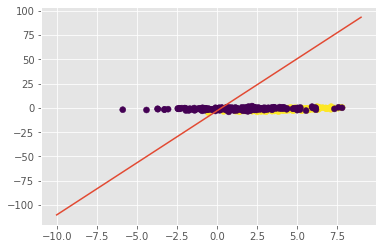

In [170]:
np.random.seed(7656)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
your_model = MySGDClassifier(batch_generator)
your_model.fit(X,y)
plot_decision_boundary(your_model)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [189]:
from sklearn.datasets import make_classification

In [190]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

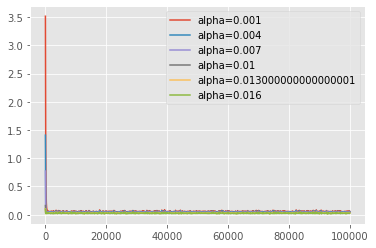

In [178]:
import statistics as st
N = 100
alpha = 0.001
while alpha <= 0.016:
    test = MySGDClassifier(batch_generator=batch_generator,alpha = alpha,
                           model_type = 'lin_reg')
    test.fit(X,y)
    stat = []
    num = []
    for i in range(0, y.shape[0], N):
        stat.append(st.mean(test.errors_log['loss'][i:i + N]))
        num.append(i)
    plt.plot(num, stat,label = 'alpha={}'.format(alpha))
    plt.legend()
    alpha += 0.003


Отбросим первые несколько значений для наглядности

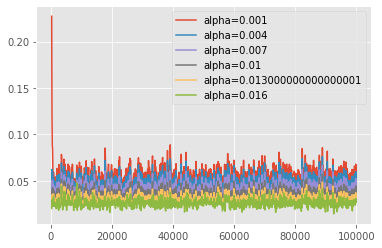

In [180]:
import statistics as st
N = 100
alpha = 0.001
while alpha <= 0.016:
    test = MySGDClassifier(batch_generator=batch_generator,alpha = alpha,
                           model_type = 'lin_reg')
    test.fit(X,y)
    stat = []
    num = []
    for i in range(3 * N, y.shape[0], N):
        stat.append(st.mean(test.errors_log['loss'][i:i + N]))
        num.append(i)
    plt.plot(num, stat,label = 'alpha={}'.format(alpha))
    plt.legend()
    alpha += 0.003

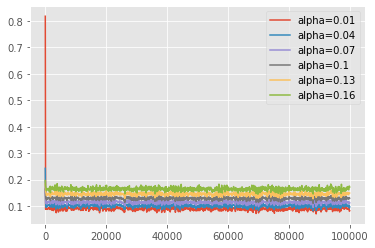

In [182]:
N = 100
alpha = 0.01
while alpha <= 0.16:
    test = MySGDClassifier(batch_generator=batch_generator,alpha = alpha,
                           model_type = 'log_reg')
    test.fit(X,y)
    stat = []
    num = []
    for i in range(0, y.shape[0], 100):
        stat.append(st.mean(test.errors_log['loss'][i:i + 100]))
        num.append(i)
    plt.plot(num, stat,label = 'alpha={}'.format(alpha))
    plt.legend()
    alpha += 0.03

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Можно сделать вывод, что при каждом из рассмотренных альфа имеет место сходимость. Сначала быстрая, но со временем ее темп замедляется. Абсолютной(loss = 0) сходимости нет ни при каком альфа. Лучше выбирать малые значения альфа, это уменьшит лосс. Чрезменрно большие значения альфа могут привести к расходимости.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

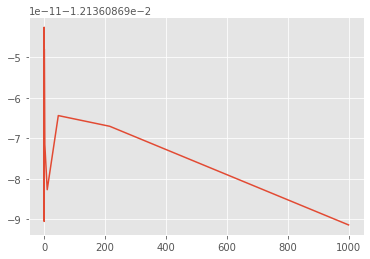

In [184]:
stat = []
num = []
for i in(np.logspace(3, -3, 10)):
    test = MySGDClassifier(batch_generator=batch_generator,C = i, alpha = 0.0001,
                           model_type = 'log_reg')
    test.fit(X,y)
    stat.append(st.mean(test.weights))
    num.append(i)
plt.plot(num, stat)

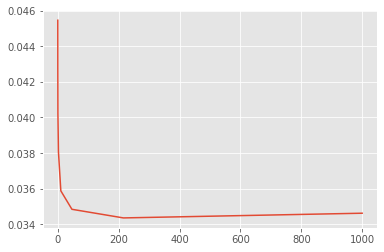

In [195]:
stat = []
num = []
for i in(np.logspace(3, -3, 10)):
    test = MySGDClassifier(batch_generator=batch_generator,C = i, alpha = 0.00001,
                           model_type = 'lin_reg')
    test.fit(X,y)
    stat.append(st.mean(test.weights))
    num.append(i)
plt.plot(num, stat)


Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Да, они сильно уменьшились

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [196]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [197]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [198]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [199]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [200]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [201]:
maxilog = 0
imaxilog = -1
for i in range(1,20):
    model = MySGDClassifier(batch_generator,i, model_type = 'log_reg')
    model.fit(X_train, y_train)
    k = f1_score(model.predict(X_train), y_train)
    print(k)
    if k > maxilog:
        maxilog = k
        imaxilog = i
print(imaxilog)    


0.614927905004241
0.6145995747696669
0.6144253932265836
0.6147772137619854
0.6146151708808002
0.6174278357501016
0.617986577181208
0.6182302062541583
0.6169323229683826
0.6116099658530416
0.6115294408097766
0.6098567613498422
0.6073949982050976
0.6067336918400749
0.5999104945177892
0.5400071123755334
0.5400071123755334
0.5055051813471503
0.5951482479784367
8


In [202]:
maxilin = 0
imaxilin = -1
for i in range(1,20):
    model = MySGDClassifier(batch_generator,batch_size = i, model_type = 'lin_reg')
    model.fit(X_train, y_train)
    k = f1_score(model.predict(X_train), y_train)
    print(k)
    if k > maxilin:
        maxilin = k
        imaxilin = i
print(imaxilin)

0.6155042779362199
0.614687216681777
0.6143097425281407
0.6149076346725229
0.6154838709677418
0.6154838709677418
0.6156822285272119
0.6156822285272119
0.6154639175257732
0.6158206647771194
0.6161772282328697
0.6158206647771194
0.6161772282328697
0.6160381001415884
0.6162162162162164
0.6158199356913183
0.6158199356913183
0.6156615661566157
0.6156615661566157
15


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [211]:
from tqdm import tqdm
import statistics as stat
from sklearn.model_selection import StratifiedKFold
al = 0.0009
ans = 0
C_best = 0
m_best = 0
al_best =0.0
while al <= 0.0009:
    for C in tqdm(range (50,101,10)):
        for m in range(100,151,10):
            modl = MySGDClassifier(batch_generator,15,C,al, m, model_type = 'lin_reg')
            skf = StratifiedKFold(n_splits=3)
            skf.get_n_splits(X_train, y_train)
            cur = []
            for i, j in skf.split(X_train, y_train):
                modl.fit(X_train[i], y_train[i])
                cur.append(f1_score(modl.predict(X_train[j]),y_train[j]))
            res = stat.mean(cur)
            if res > ans:
                ans = res
                C_best = C
                m_best = m
                al_best = al
    al+=0.0001
                








  0%|          | 0/6 [00:00<?, ?it/s]






 17%|█▋        | 1/6 [00:22<01:54, 22.96s/it]






 33%|███▎      | 2/6 [00:46<01:32, 23.14s/it]






 50%|█████     | 3/6 [01:09<01:09, 23.13s/it]






 67%|██████▋   | 4/6 [01:32<00:46, 23.19s/it]






 83%|████████▎ | 5/6 [01:56<00:23, 23.40s/it]






100%|██████████| 6/6 [02:21<00:00, 23.57s/it]


In [212]:
print(al_best)
print(C_best)
print(m_best)
print(ans)

0.0009
60
110
0.6199585691317082


In [213]:
al = 0.0001
ans = 0
C_best = 0
m_best = 0
al_best =0.0
while al <= 0.001:
    for C in tqdm(range (50,101, 10)):
        for m in range(100,151,10):
            modl = MySGDClassifier(batch_generator,8,C =C,alpha = al, max_epoch = m, model_type = 'log_reg')
            skf = StratifiedKFold(n_splits=3)
            skf.get_n_splits(X_train, y_train)
            cur = []
            for i, j in skf.split(X_train, y_train):
                modl.fit(X_train[i], y_train[i])
                cur.append(f1_score(modl.predict(X_train[j]),y_train[j]))
            res = stat.mean(cur)
            if res > ans:
                ans = res
                C_best = C
                m_best = m
                al_best = al
    al+=0.0002








  0%|          | 0/6 [00:00<?, ?it/s]






 17%|█▋        | 1/6 [02:10<10:53, 130.65s/it]






 33%|███▎      | 2/6 [04:19<08:40, 130.08s/it]






 50%|█████     | 3/6 [06:21<06:22, 127.65s/it]






 67%|██████▋   | 4/6 [08:26<04:13, 126.90s/it]






 83%|████████▎ | 5/6 [10:36<02:07, 127.80s/it]






100%|██████████| 6/6 [12:54<00:00, 129.04s/it]







  0%|          | 0/6 [00:00<?, ?it/s]






 17%|█▋        | 1/6 [02:15<11:17, 135.48s/it]






 33%|███▎      | 2/6 [04:29<08:59, 134.97s/it]






 50%|█████     | 3/6 [06:39<06:40, 133.60s/it]






 67%|██████▋   | 4/6 [08:48<04:24, 132.20s/it]






 83%|████████▎ | 5/6 [10:57<02:11, 131.13s/it]






100%|██████████| 6/6 [13:04<00:00, 130.81s/it]







  0%|          | 0/6 [00:00<?, ?it/s]






 17%|█▋        | 1/6 [02:14<11:10, 134.11s/it]






 33%|███▎      | 2/6 [04:24<08:51, 132.95s/it]






 50%|█████     | 3/6 [06:27<06:30, 130.06s/it]






 67%|██████▋   | 4/6 [08:30<04:15, 127.99s/it]






 83%|██████

In [214]:
print(al_best)
print(C_best)
print(m_best)
print(ans)

0.00030000000000000003
80
120
0.6186435262836528


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [215]:
k = 0.28
ans = 0
k_best = 0
while k < 0.4:
    modl = MySGDClassifier(batch_generator,9,C =30,alpha = 0.001, 
                           max_epoch = 20, model_type = 'log_reg',border=0.3)
    skf = StratifiedKFold(n_splits=3)
    skf.get_n_splits(X_train, y_train)
    cur = []
    for i, j in skf.split(X_train, y_train):
                modl.fit(X_train[i], y_train[i])
                cur.append(f1_score(modl.predict(X_train[j]),y_train[j]))
    res = stat.mean(cur)
    print (res)
    if res > ans:
        ans = res
        k_best = k
    k += 0.01

0.6169693818669848
0.6153105149553763
0.6181689724487631
0.6162048532565494
0.6175611561140026
0.6158090953002239
0.6178690189873176
0.6148652138493534
0.6183645829089959
0.6168270765638019
0.6151770835768678
0.6178843489170045


In [216]:
print(k_best)

0.3600000000000001


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [130]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)
 

(16627, 15) (16627,)


In [217]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_new = scaler.transform(X_test)

In [224]:
modeel = MySGDClassifier(batch_generator,915,C =60,alpha = 0.0009, 
                           max_epoch = 110, model_type = 'lin_reg')
modeel.fit(X_train, y_train)

MySGDClassifier(C=60, alpha=0.0009,
                batch_generator=<function batch_generator at 0x7ff1fb4eb050>,
                batch_size=915, border=0.3, max_epoch=110,
                model_type='lin_reg')

In [225]:
y_test_pred = modeel.predict(X_test_new)
len(y_test_pred)


16627

In [226]:
 
ans_data = {'pair_id': [], 'target': []}
ans_data['pair_id'] = test_data['pair_id']
ans_data['target'] = np.array(y_test_pred, dtype=int)
df = pd.DataFrame(ans_data, columns = ['pair_id', 'target'])
df.to_csv('ans.csv', index=None)

ник на kaggle https://www.kaggle.com/vadikbigdata

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Все было понятно, только  не совсем ясно, каким именно образом(помимо перебора в цикле) можно подобрать порог принятия решения в задаче классификации у линейной модели. 

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Очень хороший курс! Я думаю, он обеспечивает необходимый теоретический минимум для вхождения в датасайенс. Рассматриваются интересные и полезные алгоритмы и преподаватели, в целом, хорошие и отзывчивые. Хотелось бы на лекциях чуть больше математики(строгости в доказательствах). Также хотелось бы немного больше практики.

Домашнее задание интересное, учит вниманию и терпению. Во время его выполнения я получил первый опыт подбора коэффициентов для модели.